In [1]:
# Import Needed Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
# Read In Image, Convert To Grayscale
image = mpimg.imread('exit_ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [4]:
# Define Gaussian Kernel And Apply Blurring
k_size = 5
blur_gray = cv2.GaussianBlur(gray, (k_size,k_size), 0)

In [5]:
# Define Canny Parameters And Apply
l_thresh = 50
h_thresh = 150
masked_edges = cv2.Canny(blur_gray, l_thresh, h_thresh)

In [6]:
# Define Hough Transform Parameters
rho = 1
theta = np.pi/180
thresh = 1
min_line_length = 10
max_line_gap = 1

#Make Image-Sized Blank To Draw On
line_image = np.copy(image)*0

# Perform Hough Transform On Edge-Detected Image
lines = cv2.HoughLinesP(masked_edges, rho, theta, thresh, np.array([]), min_line_length, max_line_gap)

In [7]:
# Iterate Over Output Lines And Draw On Blank Image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1),(x2,y2),(255,0,0), 10)

In [8]:
# Create Color Binary Image To Combine With Lines
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))

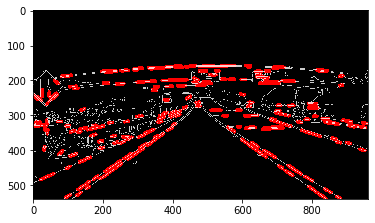

In [9]:
# Draw Lines On Edge Image And Display
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)